Test for reddening of the template sed

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


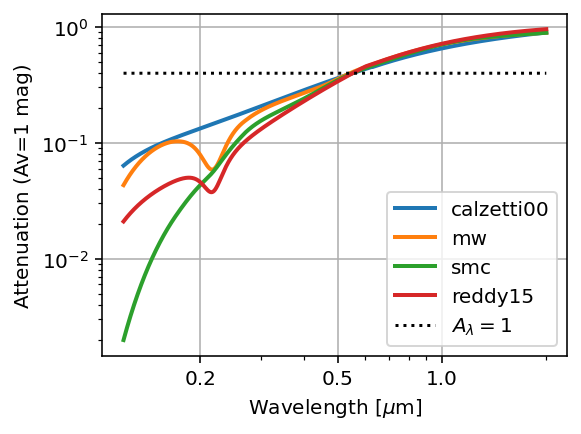

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
from astropy.table import Table
from eazy.templates import Redden
from matplotlib import pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

CWD = Path.cwd()
WD = CWD.parent

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

wave = np.arange(1200, 2.0e4)

for model in ["calzetti00", "mw", "smc", "reddy15"]:
    redfunc = Redden(model=model, Av=1.0)
    ax.plot(wave, redfunc(wave), label=model, lw=2)

ax.plot(
    wave, wave * 0 + 10 ** (-0.4), color="k", label=r"$A_\lambda = 1$", linestyle=":"
)

ax.legend()
ax.loglog()

ax.set_xticks([2000, 5000, 1.0e4])
ax.set_xticklabels([0.2, 0.5, 1.0])

ax.grid()
ax.set_xlabel(r"Wavelength [$\mu$m]")
ax.set_ylabel("Attenuation (Av=1 mag)")

fig.tight_layout(pad=0.5)

In [19]:
from dust_attenuation.averages import C00
from astropy import units as u
a = C00(Av=1)
a.k_lambda(np.linspace(0.2920, 0.2950, 5)*u.micron)


array([7.05846618, 7.04585405, 7.03327174, 7.02071917, 7.00819626])

In [86]:
%matplotlib inline

In [92]:
def calzetti00_extpol(wave, redfunc):
    slope1 = (np.log10(redfunc(1201)) - np.log10(redfunc(1200)))
    logval600 = np.log10(redfunc(1200)) + slope1 * (600-1200)
    slope2 = (logval600 + 0.4*120/4.02) / (600-100)

    attenuation = np.ones_like(wave)
    ex0 = np.where(wave >= 1200)
    attenuation[ex0] = redfunc(wave[ex0])
    ex1 = np.where((wave >= 600) & (wave < 1200))
    # ex1 = np.where(wave < 1200)
    attenuation[ex1] = 10**((np.log10(redfunc(1200)) + slope1 * (wave[ex1]-1200)))
    ex2 = np.where(wave < 600)
    attenuation[ex2] = 10**((logval600 + slope2 * (wave[ex2]-600)))

    return attenuation

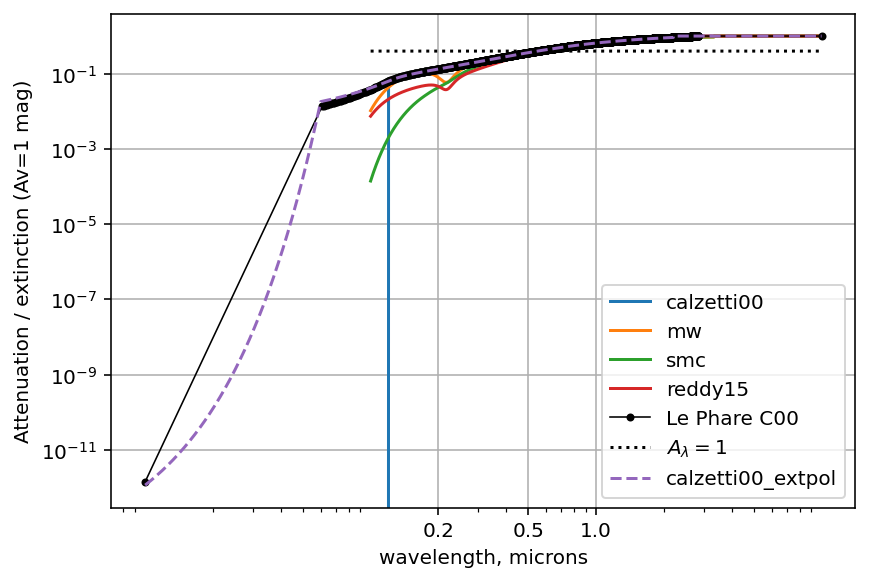

In [93]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
from astropy.table import Table
from eazy.templates import Redden
from matplotlib import pyplot as plt

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

CWD = Path.cwd()
WD = CWD.parent

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

wave = np.arange(1000, 10.0e4)

for model in ["calzetti00", "mw", "smc", "reddy15"]:
    redfunc = Redden(model=model, Av=1.0)
    ax.plot(wave, redfunc(wave), label=model)
    

lephareC00 = Table.read(WD / "SB_calzetti.dat", format="ascii.basic", data_start=0, names=["wave", "klambda"])

ax.plot(
    lephareC00["wave"], 10**(-0.4/4.05*lephareC00["klambda"]), ".-", color="k", label="Le Phare C00", lw=0.8,
)

ax.plot(
    wave , wave*0 + 10 ** (-0.4), color="k", label=r"$A_\lambda = 1$", linestyle=":"
)
wave2 = np.arange(100, 10.0e4)

redfunc = Redden(model="calzetti00", Av=1.0)
ax.plot(wave2, calzetti00_extpol(wave2, redfunc), label="calzetti00_extpol", linestyle="--")

ax.legend()
ax.loglog()

ax.set_xticks([2000, 5000, 1.0e4])
ax.set_xticklabels([0.2, 0.5, 1.0])

ax.grid()
ax.set_xlabel("wavelength, microns")
ax.set_ylabel("Attenuation / extinction (Av=1 mag)")

fig.tight_layout(pad=0.5)

In [54]:
redfunc(np.array([1199, 2000000]))

array([0., 1.])

(100.0, 4000.0)

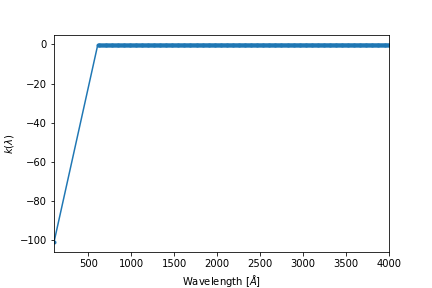

In [77]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(lephareC00["wave"][:-1], np.diff(lephareC00["klambda"]), ".-", label="lephare")
ax.set_xlabel(r"Wavelength [$\AA$]")
ax.set_ylabel(r"$k(\lambda)$")
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlim(1e2, 4.0e3)

They don't add dust emmission that corresponds to the attenuation. This might be a issue when we incorporate the SPHEREx data since it spans the wavelength range where the dust emission might be significant.

In [2]:
10 ** (-0.4)

0.3981071705534972

In [3]:
TEMPDIR = WD.parent / "BROWN_COSMOS"
temppaths_brown = list(TEMPDIR.glob("*.dat"))
temppaths_cosmos = list(TEMPDIR.glob("*.sed"))
temppaths = temppaths_brown + temppaths_cosmos

In [4]:
temp1 = Table.read(
    TEMPDIR / "Sa_A_0.sed", format="ascii.basic", names=["wave", "flux"], data_start=0
)
temp2 = Table.read(
    TEMPDIR / "Sa_A_1.sed", format="ascii.basic", names=["wave", "flux"], data_start=0
)

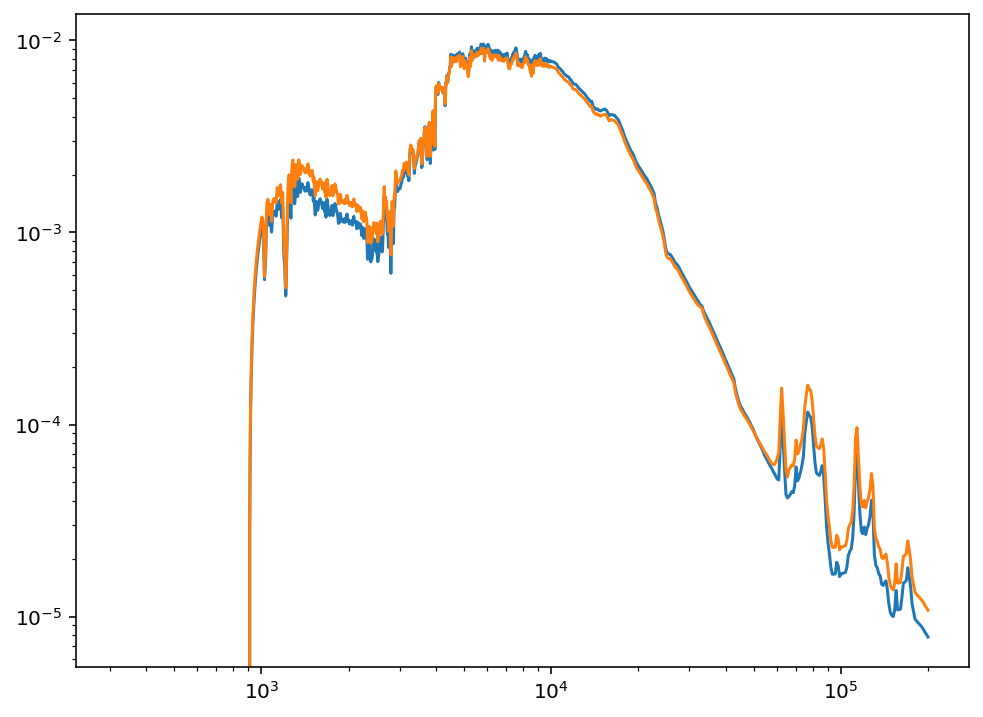

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temp1["wave"], temp1["flux"], label="temp1")
ax.plot(temp2["wave"], temp2["flux"], label="temp2")
ax.set_xscale("log")
ax.set_yscale("log")

/tmp/ipykernel_234781/1722385313.py:3: RuntimeWarning: invalid value encountered in divide
  ax.plot(temp1["wave"], temp1["flux"] / temp2["flux"])


(1200, 20000.0)

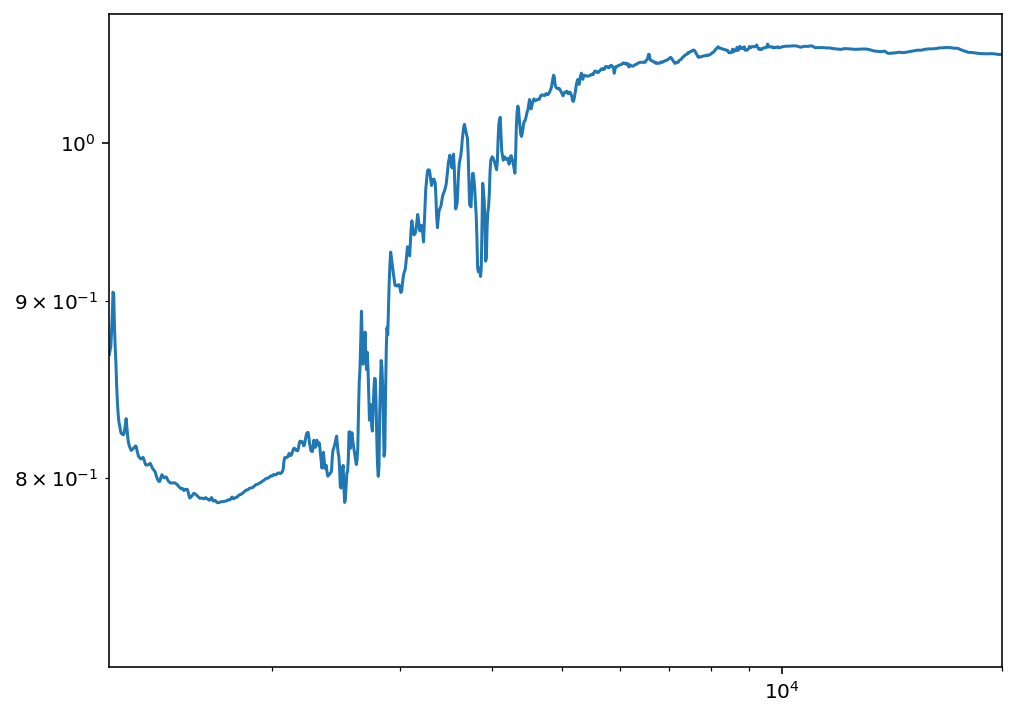

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(temp1["wave"], temp1["flux"] / temp2["flux"])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1200, 2e4)

/tmp/ipykernel_234781/2535869367.py:12: RuntimeWarning: divide by zero encountered in divide
  ax.plot(sfhz1["wave"], sfhz1["flux"][:,1] / sfhz2["flux"][:,1])
/tmp/ipykernel_234781/2535869367.py:12: RuntimeWarning: invalid value encountered in divide
  ax.plot(sfhz1["wave"], sfhz1["flux"][:,1] / sfhz2["flux"][:,1])


(1200, 20000.0)

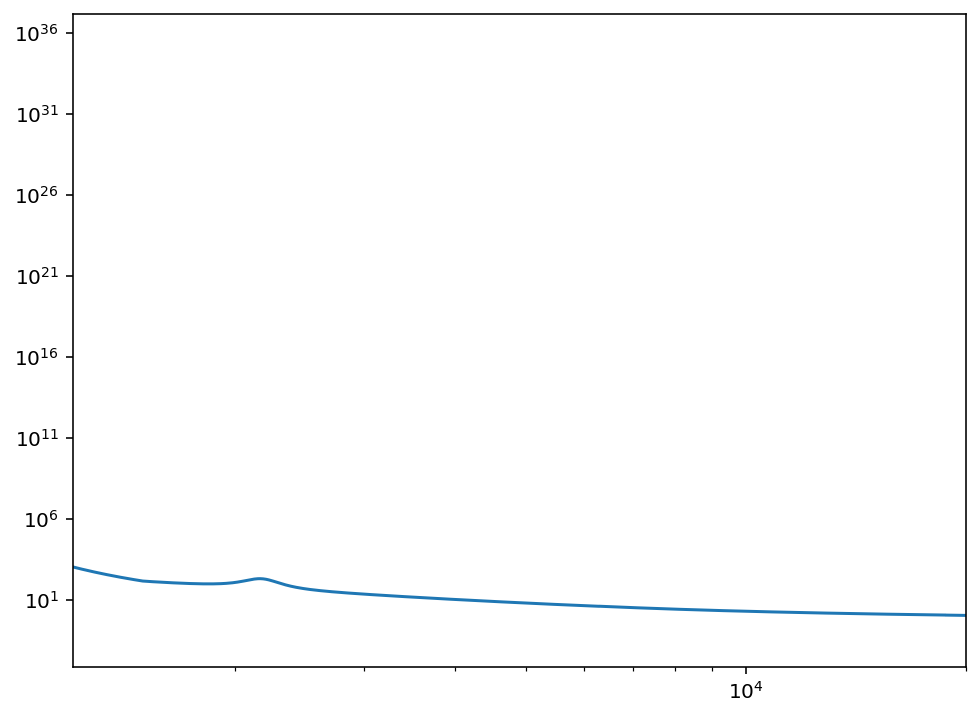

In [11]:
from eazy.utils import path_to_eazy_data

EAZYDATADIR = Path(path_to_eazy_data())
sfhz1 = Table.read(
    "/data1/hbahk/envs/repos/eazy-photoz/templates/sfhz/corr_sfhz_13_bin0_av0.01.fits"
)
sfhz2 = Table.read(
    "/data1/hbahk/envs/repos/eazy-photoz/templates/sfhz/corr_sfhz_13_bin0_av1.00.fits"
)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(sfhz1["wave"], sfhz1["flux"][:,1] / sfhz2["flux"][:,1])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1200, 2e4)

In [12]:
from astropy.io import fits

sfhz_hdu = fits.open(
    "/data1/hbahk/envs/repos/eazy-photoz/templates/sfhz/corr_sfhz_13_bin0_av0.01.fits"
)
sfhz_hdu.info()

Filename: /data1/hbahk/envs/repos/eazy-photoz/templates/sfhz/corr_sfhz_13_bin0_av0.01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    757   9300R x 2C   [D, 14D]   


In [13]:
import eazy

templ = eazy.templates.Template(
    file="/data1/hbahk/envs/repos/eazy-photoz/templates/sfhz/corr_sfhz_13_bin0_av0.01.fits"
)

In [14]:
templ.flux_flam()

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.31988149e-12, 1.29743720e-12, 1.27580954e-12])

In [15]:
templ.flux

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.31988149e-12, 1.29743720e-12, 1.27580954e-12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.35340545e-12, 1.33039955e-12, 1.30821493e-12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.42831927e-12, 1.40410687e-12, 1.38062370e-12],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.75134819e-12, 4.67199673e-12, 4.59123364e-12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.17876584e-12, 5.09201058e-12, 5.00293643e-12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.50556779e-12, 5.41284378e-12, 5.31789977e-12]])

In [16]:
sfhz_hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  120 / length of dimension 1                          
NAXIS2  =                 9300 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'wave    '                                                            
TFORM1  = 'D       '                                                            
TDISP1  = 'E13.5   '                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = '14D     '        